In [1]:
! pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [2]:
from datasets import load_dataset

In [ ]:
from huggingface_hub import login



In [4]:
ds = load_dataset("Hemg/Indian_sign_language_dataset")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

(…)-00000-of-00001-a1731e778755d263.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/42745 [00:00<?, ? examples/s]

In [5]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 42745
    })
})


In [6]:
k=ds['train'][0]['image']

In [7]:
k.show()

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# se=set()
# for i in ds['train']:
#   se.add(i['label'])

In [10]:
# print(len(se))

In [11]:
di={}
for i in ds['train']:
  if i['label'] in di:
    if len(di[i['label']])<50:
      di[i['label']].append(i['image'])
  else:
    di[i['label']]=[i['image']]

In [12]:
import cv2

In [13]:
!pip install mediapipe==0.10.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [14]:
!pip install protobuf==4.25.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.9 requires protobuf<4,>=3.11, but you have protobuf 4.25.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.3 which is incompatible.


In [15]:
import mediapipe as mp

In [16]:
import numpy as np

array([[[28, 15, 13],
        [28, 15, 13],
        [27, 14, 12],
        ...,
        [33, 43, 23],
        [41, 53, 31],
        [45, 58, 35]],

       [[28, 15, 13],
        [28, 15, 13],
        [27, 14, 12],
        ...,
        [32, 43, 22],
        [41, 52, 30],
        [44, 57, 34]],

       [[27, 14, 12],
        [27, 14, 12],
        [26, 13, 11],
        ...,
        [31, 42, 21],
        [39, 51, 29],
        [42, 55, 32]],

       ...,

       [[22, 29, 15],
        [22, 29, 15],
        [21, 29, 15],
        ...,
        [29, 50, 16],
        [37, 59, 24],
        [40, 64, 27]],

       [[29, 39, 23],
        [29, 38, 23],
        [28, 38, 22],
        ...,
        [37, 59, 23],
        [44, 68, 31],
        [48, 73, 35]],

       [[33, 43, 27],
        [32, 43, 27],
        [32, 42, 26],
        ...,
        [41, 64, 27],
        [48, 73, 35],
        [51, 77, 38]]], dtype=uint8)
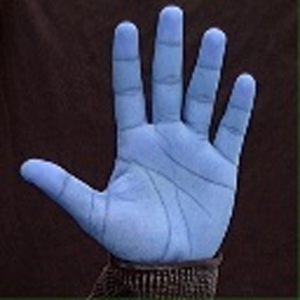

In [17]:
image=np.array(di[4][0])
image = cv2.resize(image, (300,300), interpolation=cv2.INTER_CUBIC)
image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
image

In [24]:
def get_landmarks(images):

    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    landmarks=[]
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:

      image=np.array(images)
      image = cv2.resize(image, (600,600), interpolation=cv2.INTER_CUBIC)

      results = hands.process(image)
      if results.multi_hand_landmarks:


        hand_landmarks = results.multi_hand_landmarks[0]
        for hand_landmarks in results.multi_hand_landmarks:
          current_landmarks = np.array([(landmark.x, landmark.y, landmark.z) for landmark in hand_landmarks.landmark])
          landmarks.append(current_landmarks)


      else:
        return None

    return landmarks





In [25]:
print(get_landmarks(di[4][0]))

[array([[ 5.81355155e-01,  8.83102715e-01,  9.97162488e-07],
       [ 4.34147149e-01,  8.25974107e-01, -9.09199938e-02],
       [ 3.13958645e-01,  7.19423413e-01, -1.44798934e-01],
       [ 2.12851286e-01,  6.28668249e-01, -1.89450204e-01],
       [ 1.11003131e-01,  5.65119147e-01, -2.33642459e-01],
       [ 4.53550756e-01,  4.80350405e-01, -8.65185484e-02],
       [ 4.30098653e-01,  3.08514476e-01, -1.38459802e-01],
       [ 4.21592593e-01,  2.04370648e-01, -1.83521599e-01],
       [ 4.17491943e-01,  1.09987378e-01, -2.19060108e-01],
       [ 5.58022797e-01,  4.67760146e-01, -8.54793862e-02],
       [ 5.60937345e-01,  2.77202070e-01, -1.27265438e-01],
       [ 5.66213191e-01,  1.56657159e-01, -1.65782735e-01],
       [ 5.70456147e-01,  5.27533293e-02, -1.97496474e-01],
       [ 6.51843429e-01,  4.99801278e-01, -9.53916088e-02],
       [ 6.80414140e-01,  3.29831898e-01, -1.41169176e-01],
       [ 6.98356032e-01,  2.21566722e-01, -1.72773153e-01],
       [ 7.09611893e-01,  1.22191340e-0

In [45]:
data = []
for label, images in di.items():
    for image in images:
        landmarks = get_landmarks(image)
        if landmarks:
          landmarks = np.array(landmarks)

          data.append({'landmarks': landmarks, 'label': label})

df = pd.DataFrame(data)

/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [46]:
df

,landmarks,label
0,"[[[0.48102015256881714, 0.8604199886322021, -4...",0
1,"[[[0.48306283354759216, 0.866553783416748, -4....",0
2,"[[[0.481147825717926, 0.86421799659729, -4.390...",0
3,"[[[0.47336965799331665, 0.8652632236480713, -5...",0
4,"[[[0.496616005897522, 0.9015227556228638, -1.1...",0
...,...,...
3282,"[[[0.8470543026924133, 0.6449824571609497, -1....",34
3283,"[[[0.842670202255249, 0.6352863311767578, -9.4...",34
3284,"[[[0.8425509929656982, 0.6366695165634155, -8....",34
3285,"[[[0.8436341881752014, 0.6339237689971924, -9....",34


In [47]:
df= df[df['landmarks'].apply(lambda x: len(x) > 0)]
df

,landmarks,label
0,"[[[0.48102015256881714, 0.8604199886322021, -4...",0
1,"[[[0.48306283354759216, 0.866553783416748, -4....",0
2,"[[[0.481147825717926, 0.86421799659729, -4.390...",0
3,"[[[0.47336965799331665, 0.8652632236480713, -5...",0
4,"[[[0.496616005897522, 0.9015227556228638, -1.1...",0
...,...,...
3282,"[[[0.8470543026924133, 0.6449824571609497, -1....",34
3283,"[[[0.842670202255249, 0.6352863311767578, -9.4...",34
3284,"[[[0.8425509929656982, 0.6366695165634155, -8....",34
3285,"[[[0.8436341881752014, 0.6339237689971924, -9....",34


In [ ]:
import pandas as pd
import numpy as np


# Preprocessing function to ensure landmarks are (2, 21, 3)
def preprocess_hand_landmarks(landmarks):
    # If shape is (1, 21, 3), pad with zeros to make it (2, 21, 3)
    if landmarks.shape == (1, 21, 3):
        padded_landmarks = np.zeros((2, 21, 3))
        padded_landmarks[0] = landmarks[0]
        return padded_landmarks
    # If already (2, 21, 3), return as is
    elif landmarks.shape == (2, 21, 3):
        return landmarks
    else:
        raise ValueError(f"Unexpected shape {landmarks.shape} for hand landmarks!")

df['landmarks'] = df['landmarks'].apply(preprocess_hand_landmarks)

def normalize_landmarks(landmarks):
    
    return landmarks / np.linalg.norm(landmarks, axis=-1, keepdims=True)

df['landmarks'] = df['landmarks'].apply(normalize_landmarks)




<ipython-input-70-867c7d516450>:25: RuntimeWarning: invalid value encountered in divide
  return landmarks / np.linalg.norm(landmarks, axis=-1, keepdims=True)


In [62]:

X = df['landmarks']
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df['landmarks'].tolist()) 
y = np.array(df['label'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


model = Sequential([
    Flatten(input_shape=(2, 21, 3)),  
    Dense(128, activation='relu'),
    Dropout(0.3), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0274 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0278 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0278 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0223 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0257 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0218 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0260 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0266 - loss: nan - val_accuracy: 0.0380 - val_loss: nan
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0